# Computer Vision - Week 3

## Content:
### - Edge detection
### - Interpolation

In [6]:
import cv2 as cv
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact, interactive, interact_manual
import os

images = []
images_string = []
images_folder = os.scandir('./Assets')
for image in images_folder:
    if(image.name[0] != '.'):
        globals()[f'{image.name[:len(image.name)-4]}'] = cv.cvtColor(cv.imread(f'./Assets/{image.name}'), cv.COLOR_BGR2GRAY)
        images.append(globals()[f'{image.name[:len(image.name)-4]}'])
        images_string.append(image.name[:len(image.name)-4])
print(images_string)

['adaptive', 'meisje_met_de_parel', 'einsten', 'switzerland', 'monalisa']


## Edge detection with Canny
### Theory:
#### - Noise reduction with blur filtering
#### - Find the intensity gradient
#### - Non-maximum supression to eliminate unwanted pixels
#### - Hysteresis Thresholding to define the edges. Max e min values are set and those between are decided by their connectivity

In [35]:
def canny(image, min_thresh, max_thresh, apertureSize):
    global images
    global images_string
    global canny_image
    image = images[images_string.index(image)]
    
    canny_image = cv.Canny(image, min_thresh, max_thresh, apertureSize=apertureSize)
    fig, axes = plt.subplots(1, 2, figsize=(14,12))
    axes[0].imshow(image, 'gray')
    axes[1].imshow(canny_image, 'gray')

interactive(canny, image=images_string, min_thresh=(0,255), max_thresh=(0,255), apertureSize=(3,7,2))

interactive(children=(Dropdown(description='image', options=('adaptive', 'meisje_met_de_parel', 'einsten', 'sw…

## Finding contours

6687


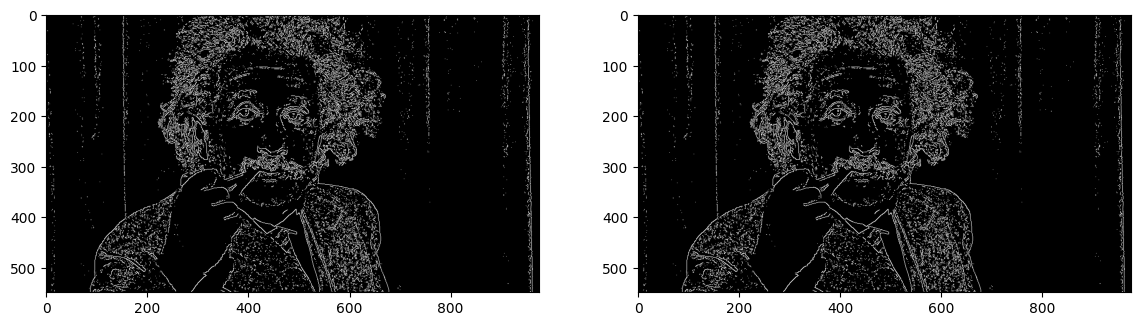

In [37]:
contours_image = np.zeros((canny_image.shape[0], canny_image.shape[1]))
contours, hierarchy = cv.findContours(canny_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
cv.drawContours(contours_image, contours, -1, (255,255,255), 1)
print(len(contours))

fig, axes = plt.subplots(1, 2, figsize=(14,12))
axes[0].imshow(canny_image, 'gray')
axes[1].imshow(contours_image, 'gray')

## Interpolation

In [ ]:
def resize_image(image, method):
    global images
    global images_string
    global resized_image
    image = images[images_string.index(image)]
    
    resized_image = cv.resize(image, )